In [1]:
from scipy import stats
import statistics as stat

edu_HighSchool = [20000, 30000, 60000, 20000, 40000, 60000, 60000]
edu_PartialCollege = [60000, 40000, 30000, 130000, 60000, 40000]
edu_PartialHighSchool = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]
edu_Bachelors = [140000, 20000, 90000, 120000, 60000, 130000, 20000, 106000, 80000, 30000, 100000, 120000]
edu_Graduate = [160000, 50000, 80000, 30000, 40000, 80000, 130000, 100000, 130000, 50000, 130000]

print('Partial High School:', str(int(stat.mean(edu_PartialHighSchool))))
print('High School:', str(int(stat.mean(edu_HighSchool))))
print('Partial College:', str(int(stat.mean(edu_PartialCollege))))
print('Bachelors:', str(int(stat.mean(edu_Bachelors))))
print('Graduate:', str(int(stat.mean(edu_Graduate))))

Partial High School: 24000
High School: 41428
Partial College: 60000
Bachelors: 84666
Graduate: 89090


In [3]:
t , p = stats.ttest_ind(edu_PartialHighSchool ,edu_HighSchool )
print(f't value:' , t)
print(f'p value:' , p)

t value: -1.9131753750607223
p value: 0.07500898731578687


/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_22029/897577418.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_PartialHighSchool, label="Partial High School")
/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_22029/897577418.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

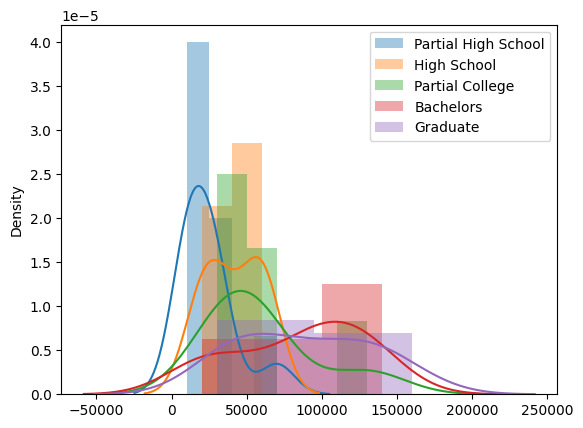

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(edu_PartialHighSchool, label="Partial High School")
sns.distplot(edu_HighSchool, label="High School")
sns.distplot(edu_PartialCollege, label="Partial College")
sns.distplot(edu_Bachelors, label="Bachelors")
sns.distplot(edu_Graduate, label="Graduate")

plt.legend()
plt.show()

In [7]:
#one-way ANOVA
f_statistic, p_value = stats.f_oneway(edu_Bachelors, edu_Graduate, edu_HighSchool, edu_PartialCollege, edu_PartialHighSchool)


print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 6.317894793336646
P-value: 0.00046794685448987405


In [8]:
import pandas as pd 

df = pd.read_csv('data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='charges', ylabel='Count'>

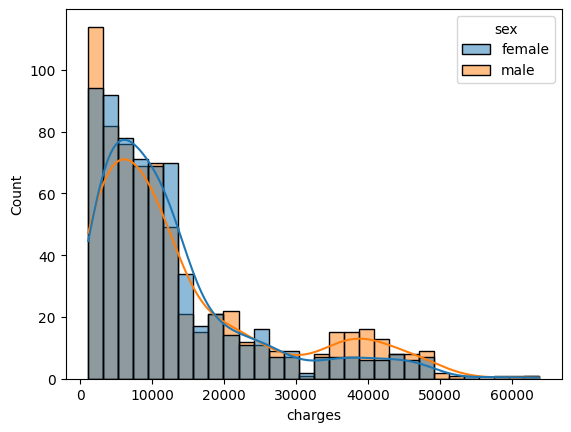

In [9]:
sns.histplot(data = df , x= "charges" , hue = 'sex' , kde= True)


In [10]:

smoker_y = df[df['smoker'] == 'yes']
smoker_n = df[df['smoker'] == 'no']

t_stat, p_value = stats.ttest_ind(smoker_y['charges'], smoker_n['charges'])


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 46.66492117272371
P-value: 8.271435842179101e-283


In [11]:
# categorical feature in each variable
feature = 'smoker'
label = 'charges'


groups = df[feature].unique()

print(groups)

['yes' 'no']


In [12]:

feature = 'smoker'
label = 'charges'


groups = df[feature].unique()


grouped_values = [df[df[feature] == group][label] for group in groups]


stats.f_oneway(*grouped_values)

F_onewayResult(statistic=np.float64(2177.614868056519), pvalue=np.float64(8.271435842175444e-283))

In [13]:
# automating using anova function
def anova(feature, label):
    groups = df[feature].unique()
    grouped_values = [df[df[feature] == group][label] for group in groups]
    return stats.f_oneway(*grouped_values)



In [14]:

anova('smoker', 'charges')

F_onewayResult(statistic=np.float64(2177.614868056519), pvalue=np.float64(8.271435842175444e-283))